## Chuẩn bị dữ liệu

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


## Sắp xếp thư mục ảnh và nhãn

Để hiểu rõ hơn về bước này, các bạn có thể tham khảo bài chia sẻ về cách [Huấn luyện mô hình Object Detection với YOLOv5](https://hungk20.github.io/computer%20vision/practical/train-yolov5/).

Sau khi đã có ảnh và nhãn, tập dữ liệu có thể được sắp xếp như sau:
```
custom_dataset
├── custom_dataset.yaml
├── custom_model.yaml
└── images_and_labels
```
- File cấu hình của tập dữ liệu `custom_dataset.yaml` chứa đường dẫn đến thư mục ảnh và thông tin đối tượng.
```python
# relative paths from folder yolov5
#  .
#  ├── custom_dataset
#  └── yolov5
train: ../custom_dataset/images_and_labels/images/train/
val: ../custom_dataset/images_and_labels/images/valid/
# number of classes
nc: 1
# class names
names: ['panda']
```
- File cấu hình của mô hình `custom_model.yaml` chứa thông tin cấu trúc mạng, ở đây chúng ta dùng cấu trúc mô hình YOLOv5l với mục tiêu rút ngắn thời gian huấn luyện và kích thước mô hình. Lưu ý là chúng ta hoàn toàn có thể dùng cấu trúc khác, ví dụ như YOLOv5s, YOLOv5m, YOLOv5x từ YOLOv5 hoặc một cấu trúc mới do chúng ta tự thiết kế. Tham khảo tại: https://github.com/ultralytics/yolov5/tree/master/models
- Thư mục `image_and_labels` chứa ảnh và nhãn dùng cho việc huấn luyện mô hình.
```
images_and_labels
├── images
│   ├── train
│   │   ├── train_001.jpg
│   │   ├── train_002.jpg
│   │   └── ...
│   ├── valid
│   │   ├── valid_001.jpg
│   │   ├── valid_002.jpg
│   │   └── ... 
│   └── test
│       ├── test_001.jpg
│       ├── test_002.jpg
│       └── ...
└── labels
      ├── train
      │   ├── train_001.txt
      │   ├── train_002.txt
      │   └── ...
      └── valid
          ├── valid_001.txt
          ├── valid_002.txt
          └── ...
```

Dữ liệu

In [2]:
# kiểm tra file cấu hình của tập dữ liệu
!cat /content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_dataset/custom_dataset.yaml

# relative paths from folder yolov5
#  .
#  ├── custom_dataset
#  └── yolov5
train: ../custom_dataset/images_and_labels/images/train/
val: ../custom_dataset/images_and_labels/images/valid/
test: ../custom_dataset/images_and_labels/images/test/
# number of classes
nc: 2

# class names
names: ['1-line', '2-line']


In [3]:
# kiểm tra file cấu hình của mô hình
!head /content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_dataset/custom_model.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 2  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16


## Đổi tên file test, valid, train

In [ ]:
#rename data if needed
import os
from pathlib import Path

directory = 'train'

path_image = '/content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_dataset/images_and_labels/images/' + directory + '/'
path_label = '/content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_dataset/images_and_labels/labels/' + directory + '/'

file_images = os.listdir(path_image)
file_labels = os.listdir(path_label)

n = 0
for index_images, image in enumerate(file_images):
  for index_labels, label in enumerate(file_labels):
    if Path(path_image + image).stem == Path(path_label + label).stem:
      print(image + " >>><<< " + label + ' ===> '  + directory + '_' + str(n))
      print('\n')
      os.rename(os.path.join(path_image, image), os.path.join(path_image, ''.join([directory + '_' + str(n), '.jpg'])))
      os.rename(os.path.join(path_label, label), os.path.join(path_label, ''.join([directory + '_' + str(n), '.txt'])))
      n=n+1
      break

print('\n=================\n')
print('Renamed total: ' + str(n))

## Tải mô hình YOLOv5

In [4]:
!pip install jedi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:00


In [5]:
%cd /content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
# vào thư mục yolov5 mới được cloned về
%cd yolov5
# (không bắt buộc) dùng 1 commit nhất định
# !git reset --hard 886f1c03d839575afecb059accf74296fad395b6
# cài đặt các thư viện cần thiết
!pip install -r requirements.txt  # install dependencies

/content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1
/content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.3
    Uninstalling setuptools-63.4.3:
      Successfully uninstalled setuptools-63.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.


## Kiểm tra GPU

In [6]:
import torch

# kiểm tra notebook đã dùng GPU (thời gian huấn luyện nhanh hơn)
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


## Huấn luyện

Các bước chuẩn bị đã xong, giờ việc huấn luyện trở nên rất đơn giản với `train.py` trong thư mục `yolov5`.

Một số tham số được dùng:
- `img`: kích thước ảnh (độ phân giải)
- `batch`: số ảnh dùng để huấn luyện trong mỗi lượt
- `epochs`: số lượt huấn luyện cho tất cả các ảnh trong tập dữ liệu train
- `data`: đường dẫn đến file cấu hình của tập dữ liệu
- `cfg`: đường dẫn đến file cấu hình của mô hình
- `weights`: đường dẫn đến file weight chứa độ liên kết giữa các neuron (để '' là để huấn luyện từ đầu)
- `name`: tên thư mục để lưu mô hình
- `cache`: dùng bộ nhớ đệm để huấn luyện nhanh hơn

In [7]:
# install requirements
!pip install tensorrt tensorflow
!pip install tensorflow
!pip install gitpython
!pip install thop
!pip install setuptools
# !pip install clearml
# !pip install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.5/823.5 KB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.5/379.5 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 MB 2.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip uninstall comet_ml
!pip uninstall clearml

In [11]:
%cd /content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/yolov5/

/content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/yolov5


In [ ]:
%%time
!python train.py --img 640 --batch 16 --epochs 100 \
  --data /content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_dataset/custom_dataset.yaml \
  --cfg /content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_dataset/custom_model.yaml \
  --weights yolov5s.pt --name /content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_model/  --cache

train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_dataset/custom_model.yaml, data=/content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_dataset/custom_dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=/content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_model/, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.0

## Kết quả


Ảnh đầu gốc vào và ảnh tăng cường (data augmentaion) khi huấn luyện mô hình được lưu ở `yolov5/runs/train/custom_model/`.

In [2]:
%cd /content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/

/content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1


In [ ]:
from IPython.display import Image, display

print("Ảnh gốc và nhãn tương ứng:")
Image(filename='custom_model2/val_batch0_labels.jpg', width=900)

In [ ]:
print("Ảnh tăng cường (augmented)")
Image(filename='custom_model2/train_batch0.jpg', width=900)

Dùng `tensorboard` để kiểm tra kết quả của việc huấn luyện (các chỉ số thay đổi như thế nào sau mỗi epoch).

In [6]:
%load_ext tensorboard
%tensorboard --logdir custom_model2/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-03-17 07:33:12.426528: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 07:33:13.687460: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-17 07:33:13.687719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/

# Dự đoán với mô hình được huấn luyện

Khi việc huấn luyện kết thúc, có 2 file weights mô hình được lưu lại:

- Mô hình tốt nhất: `best.pt` (tốt nhất dựa trên chỉ số Average Precision trên tập kiểm định)
- Mô hình cuối cùng: `last.pt`

Chúng ta dùng `detect.py` để thực hiện dự đoán với mô hình tốt nhất có được từ quá trình huấn luyện.
- `weights`: file weight dùng để dự đoán
- `img`: kích thước ảnh (độ phân giải)
- `conf`: độ tin cậy
- `source`: đường dẫn đến thư mục ảnh

In [12]:
!python detect.py --weights /content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_model2/weights/best.pt \
    --img 640 --conf 0.4 \
    --source /content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_dataset/images_and_labels/images/test/

detect: weights=['/content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_model2/weights/best.pt'], source=/content/drive/MyDrive/abcabc/DUT/HK6/PBL5/train_model_1/custom_dataset/images_and_labels/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirements "gitpython>=3.1.30" "setuptools>=65.5.1" not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, b

Kết quả dự đoán được lưu tại thư mục `/yolov5/runs/detect/exp/` (hoặc exp1, 2, 3, … tuỳ vào số lần chúng ta chạy dự đoán với `detect.py`).

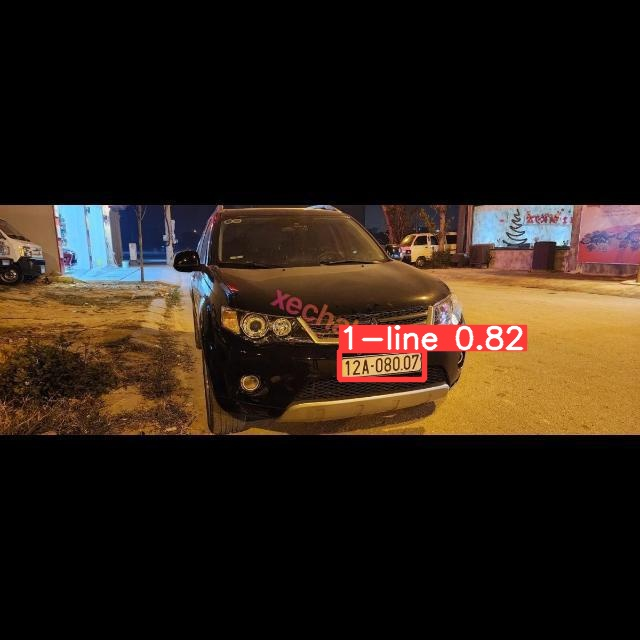

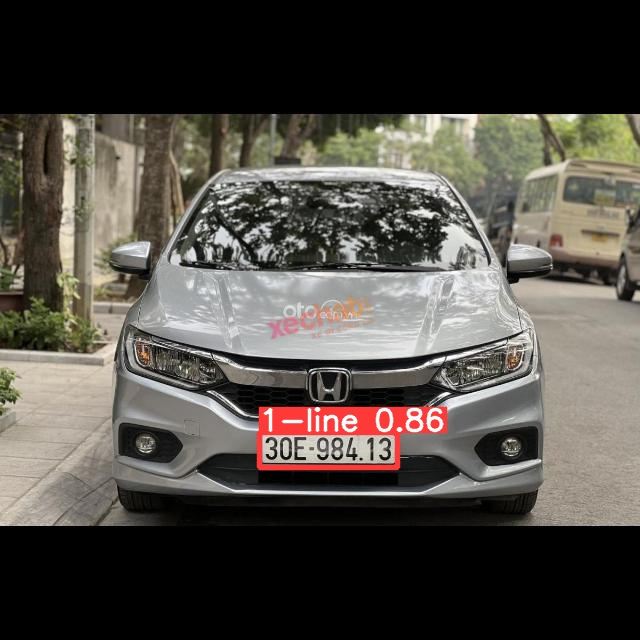

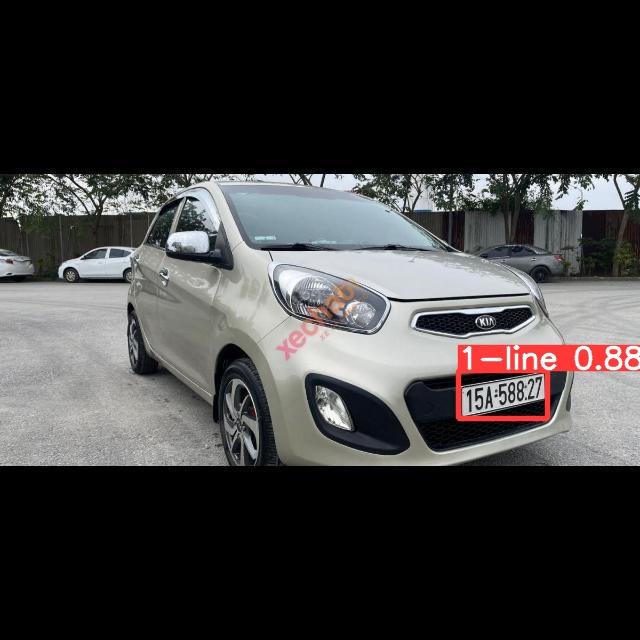

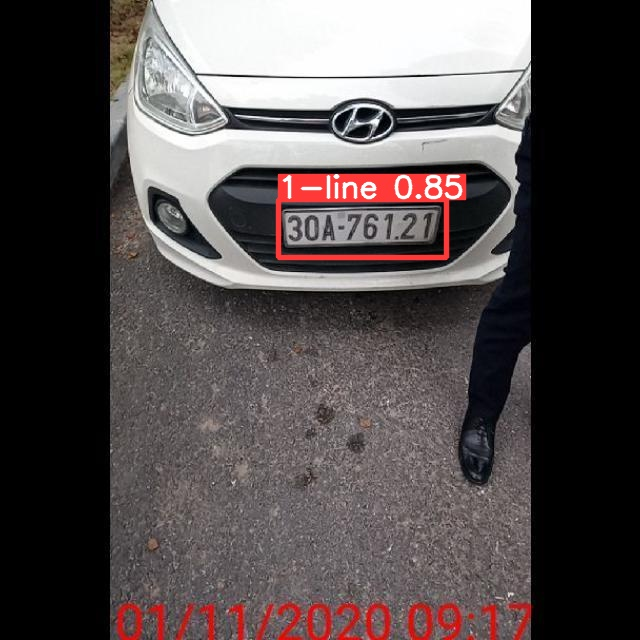

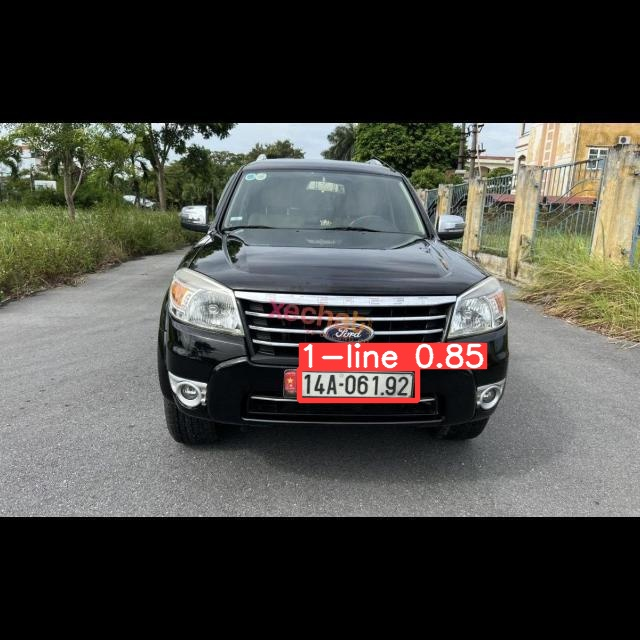

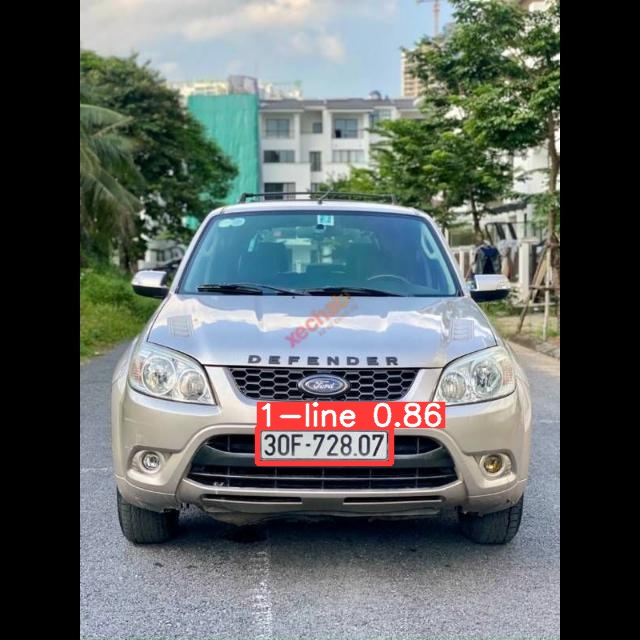

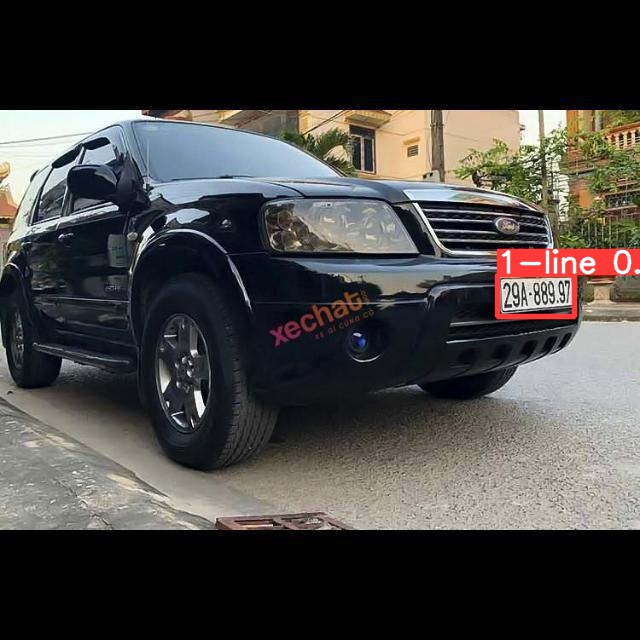

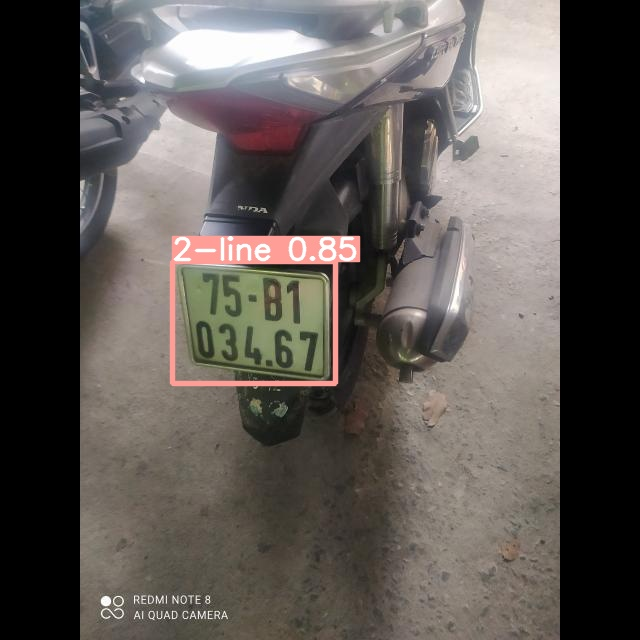

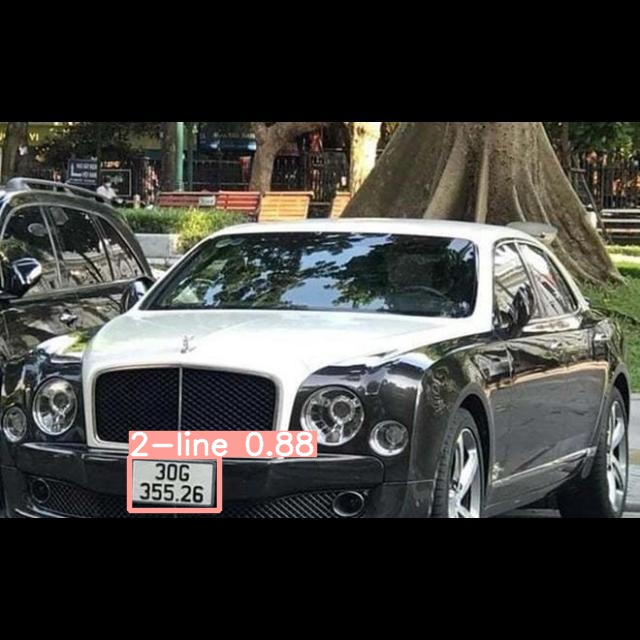

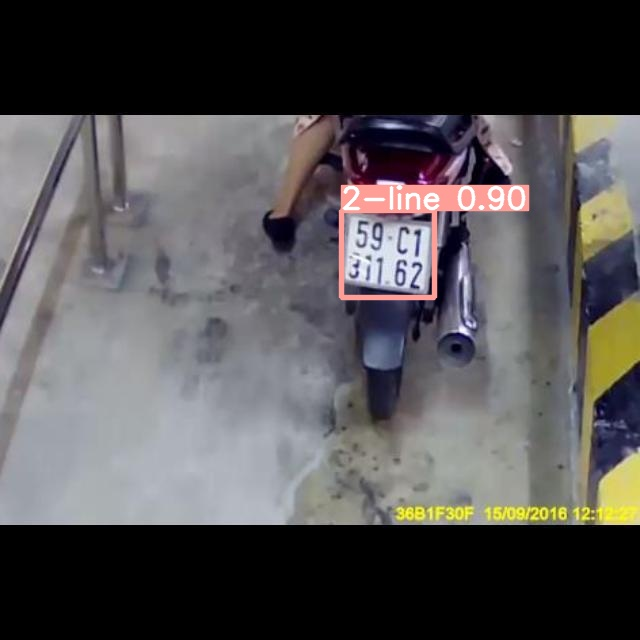

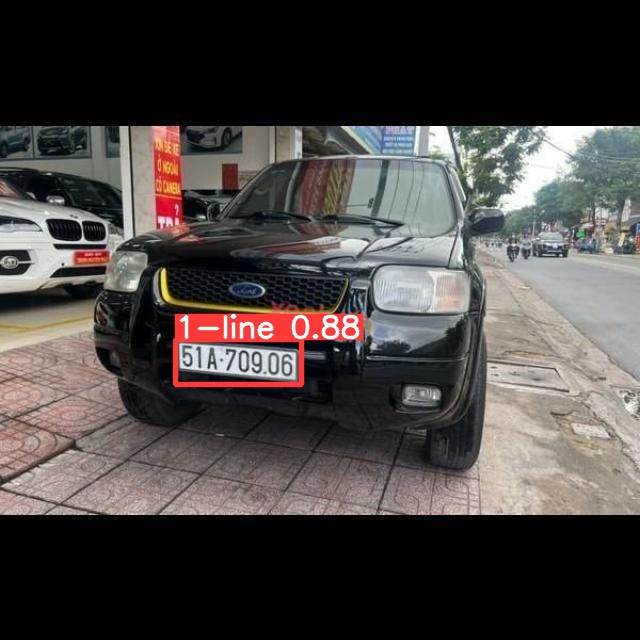

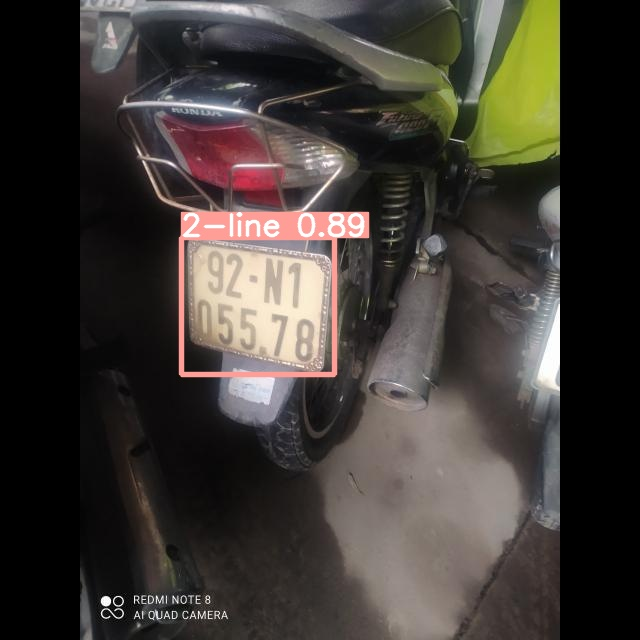

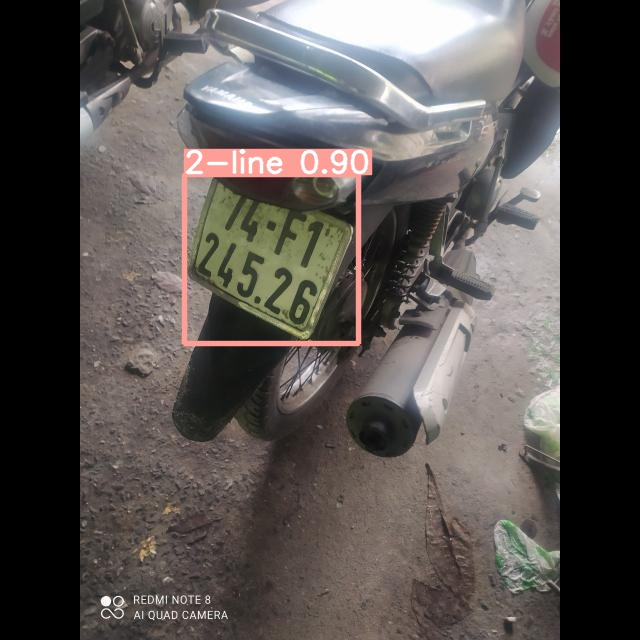

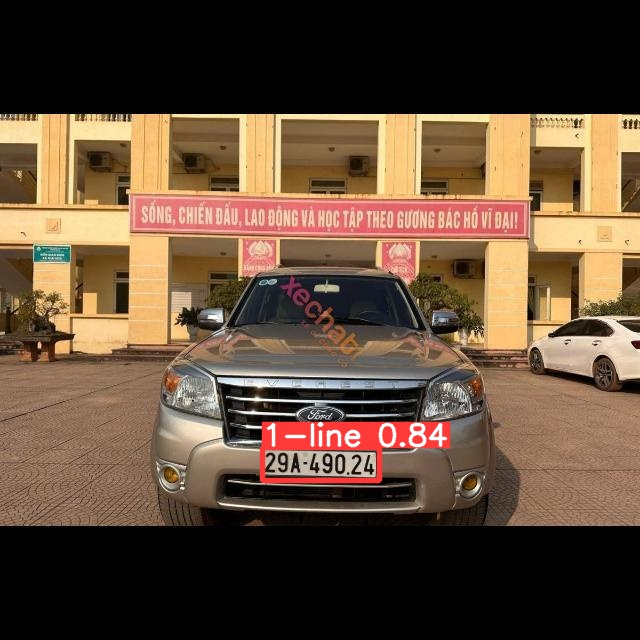

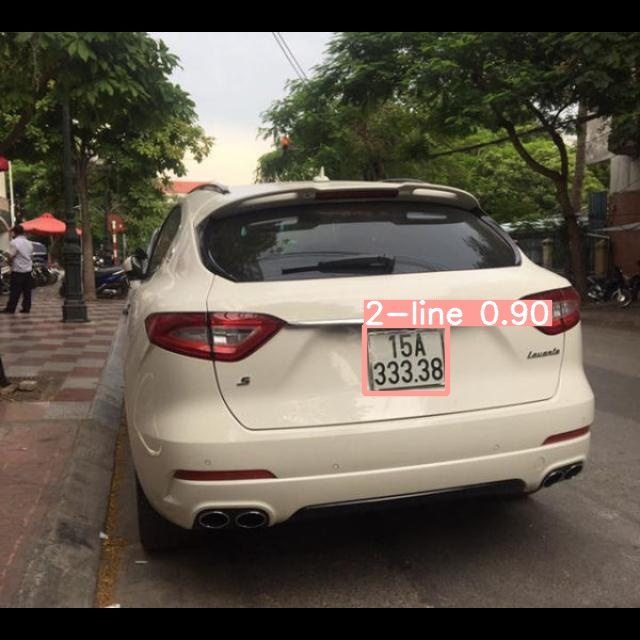

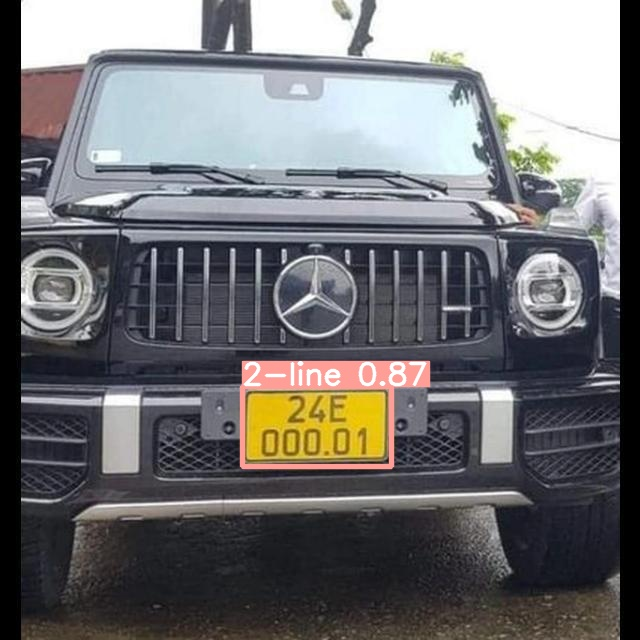

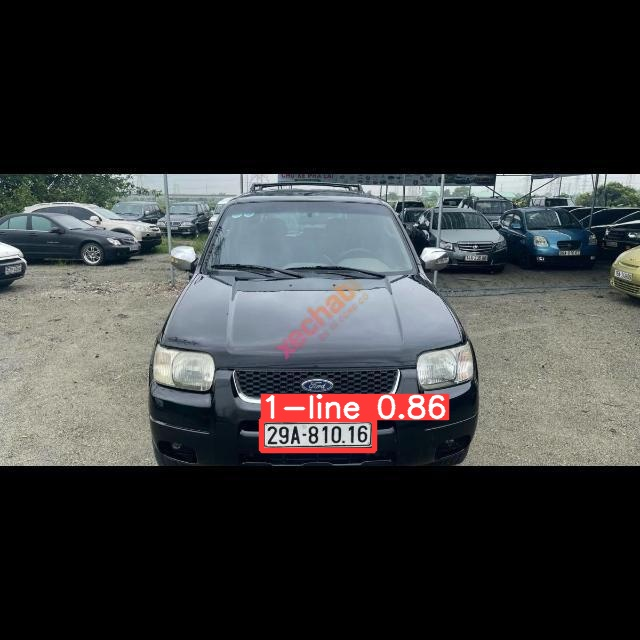

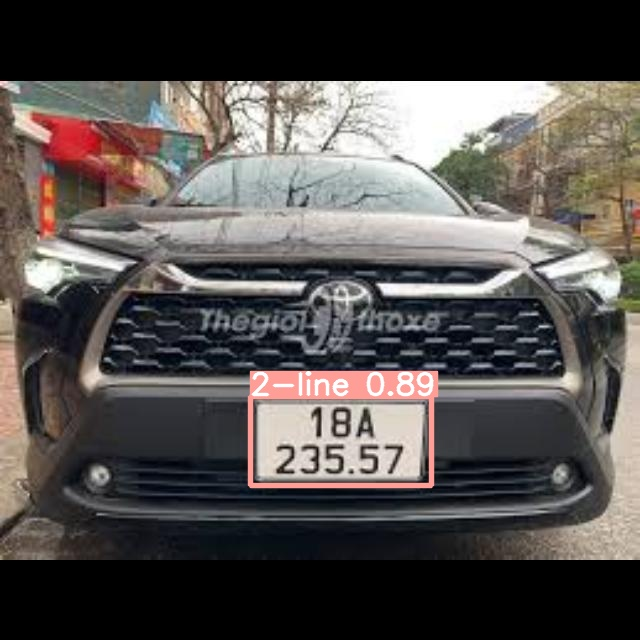

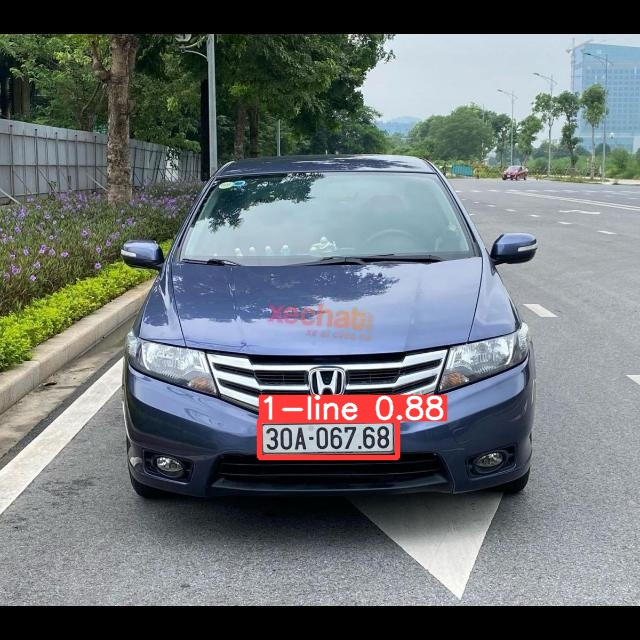

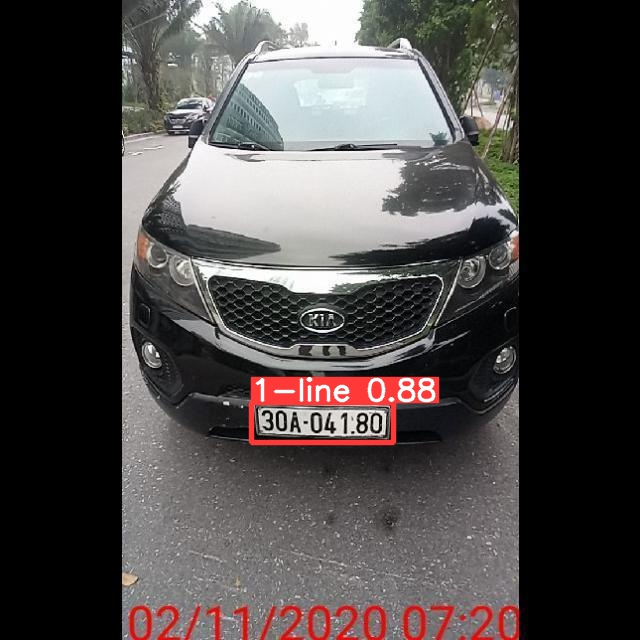

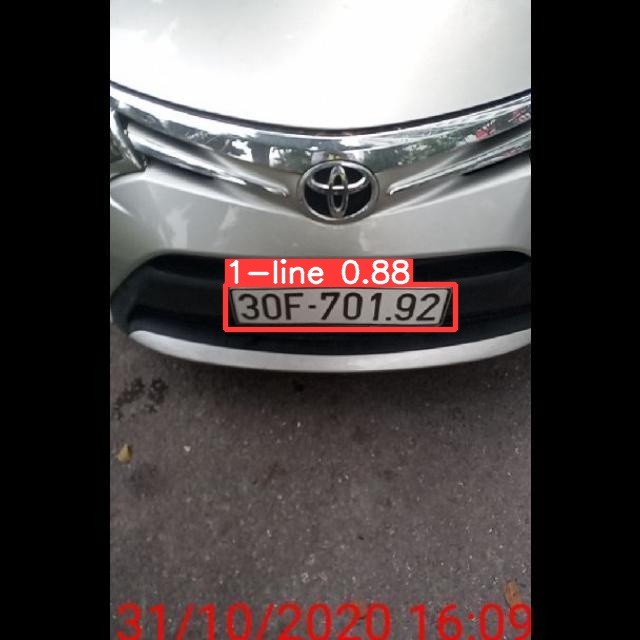

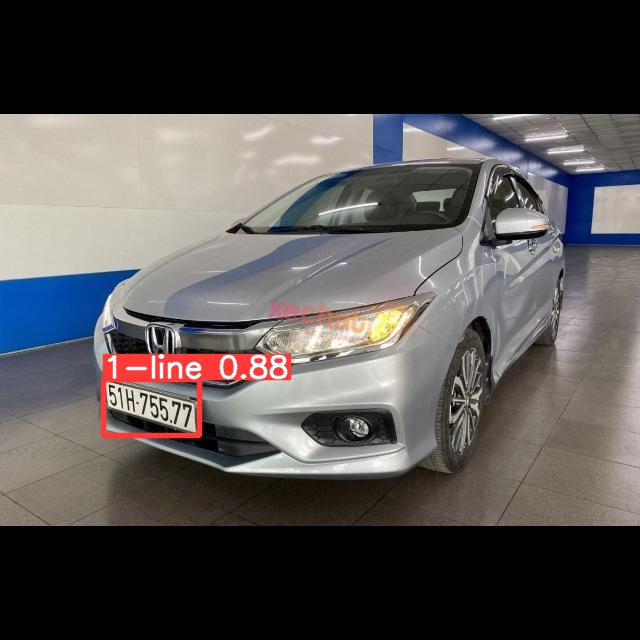

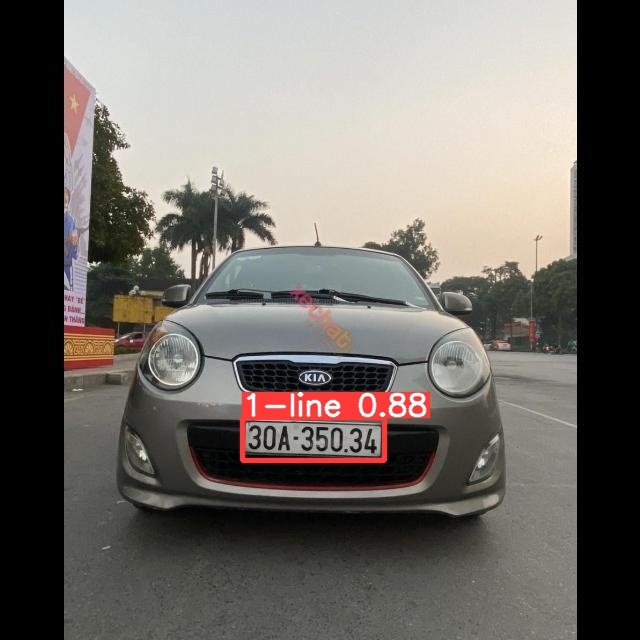

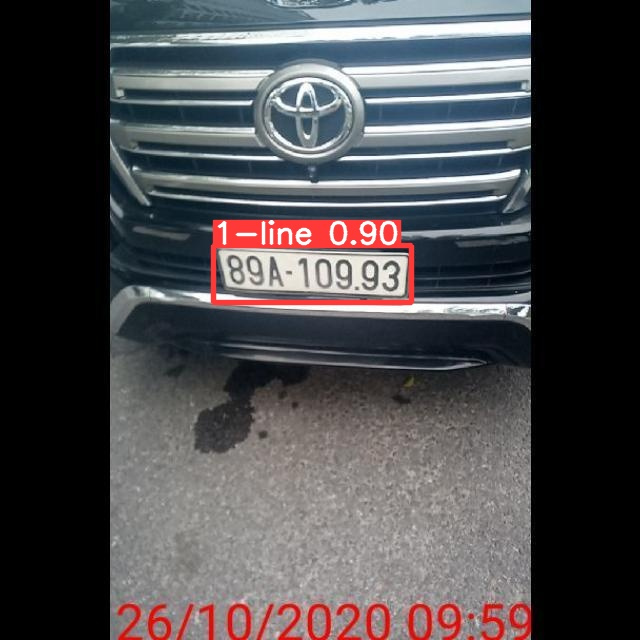

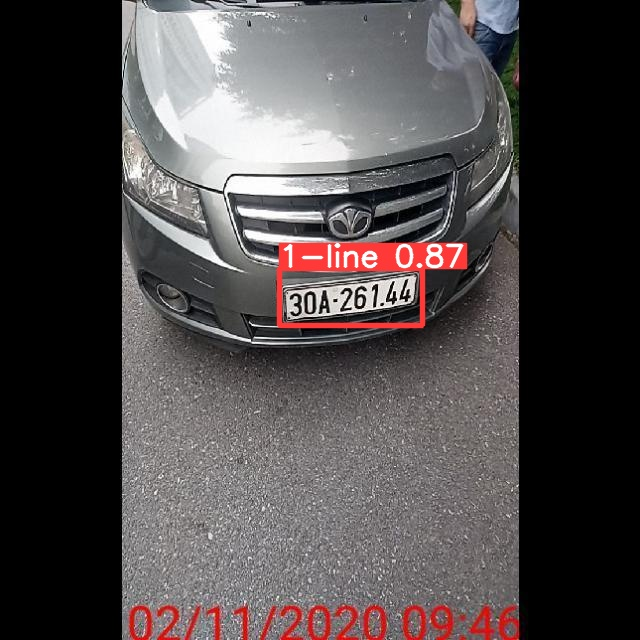

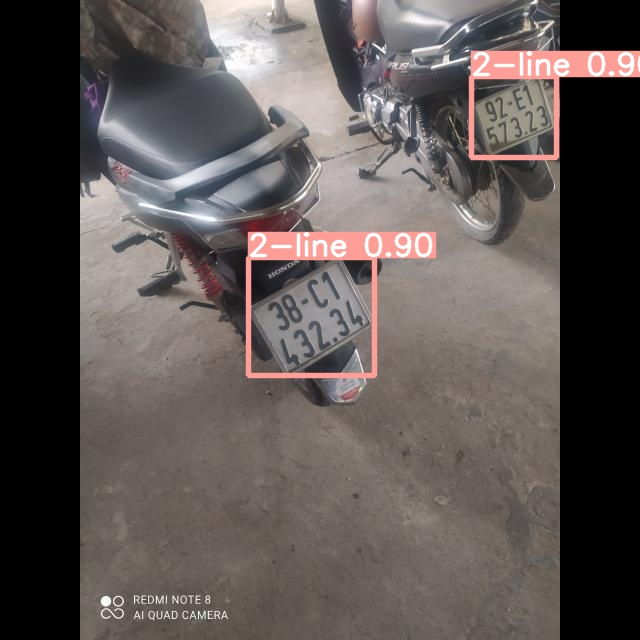

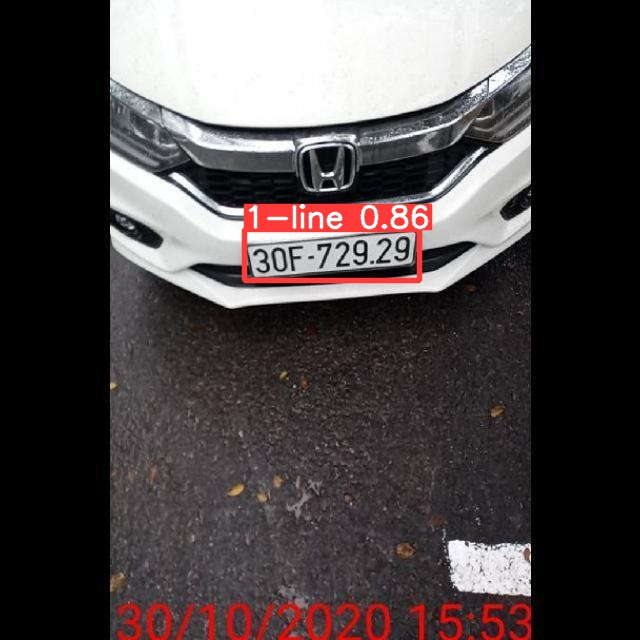

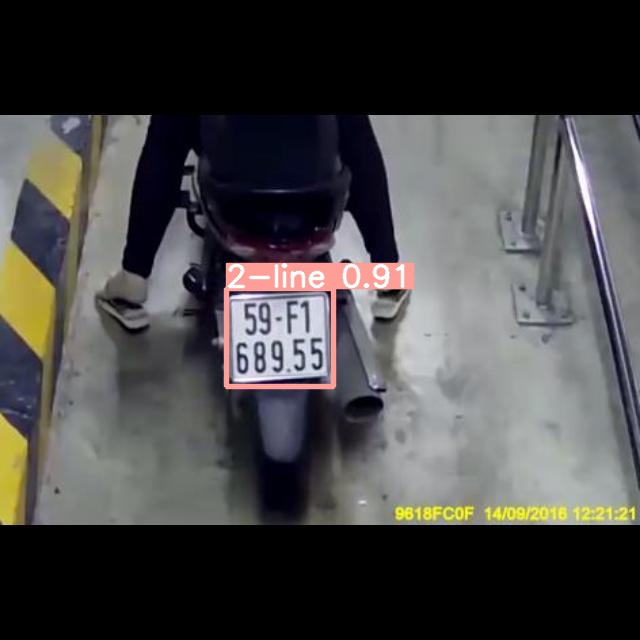

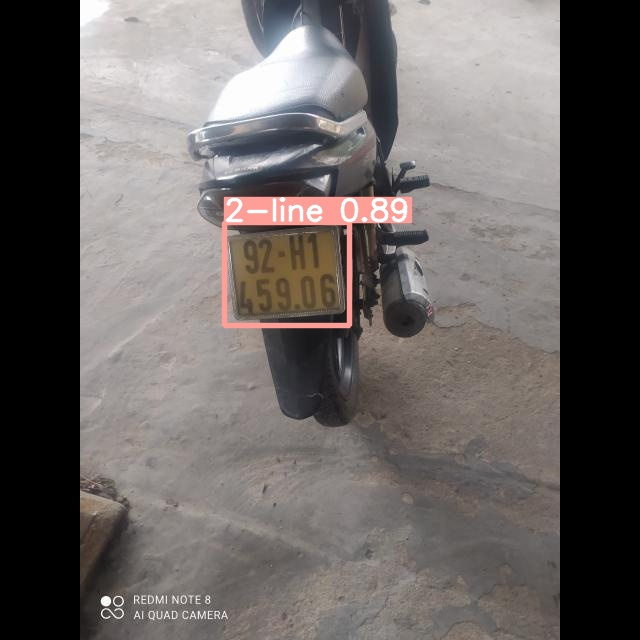

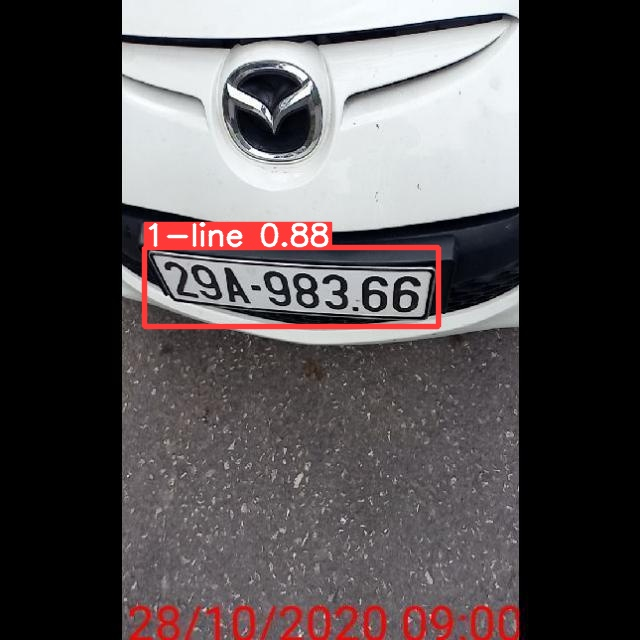

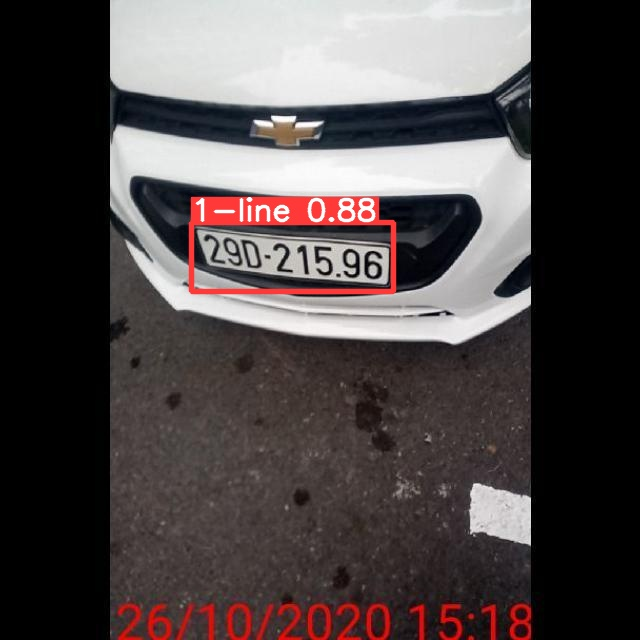

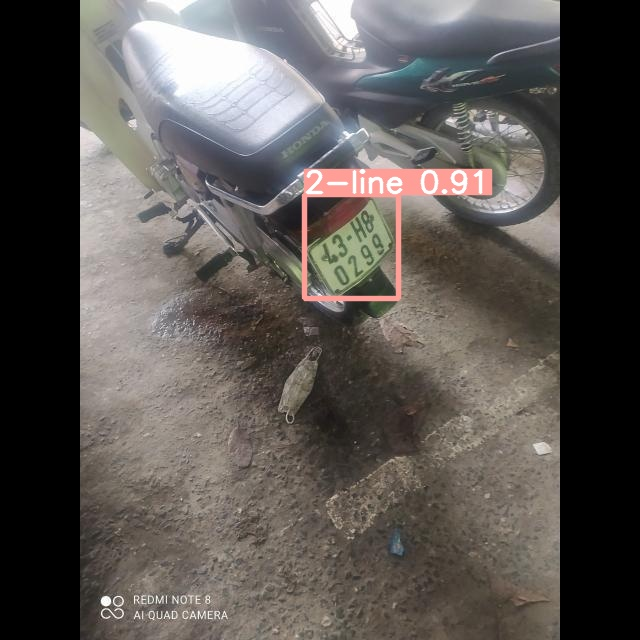

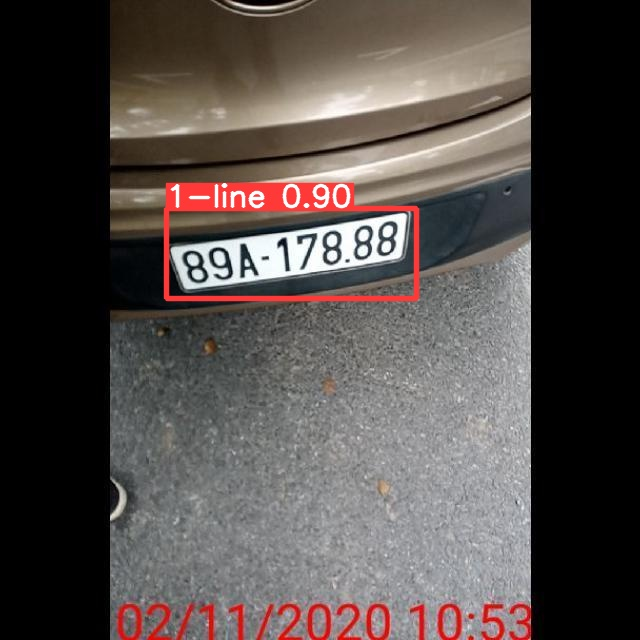

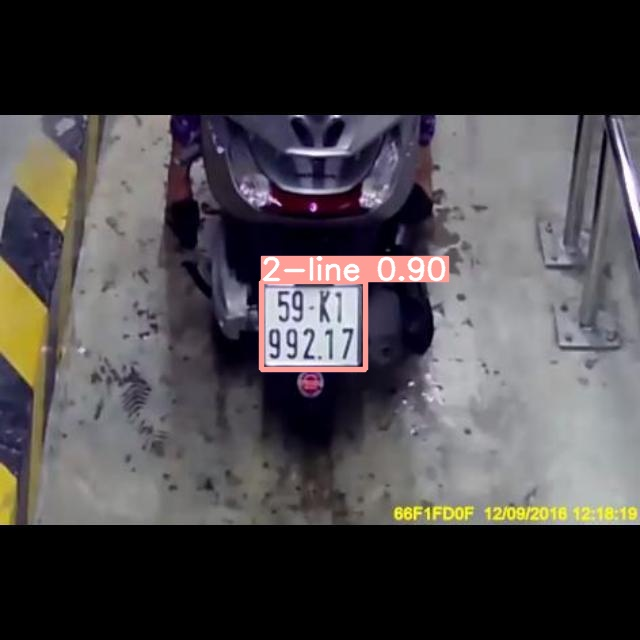

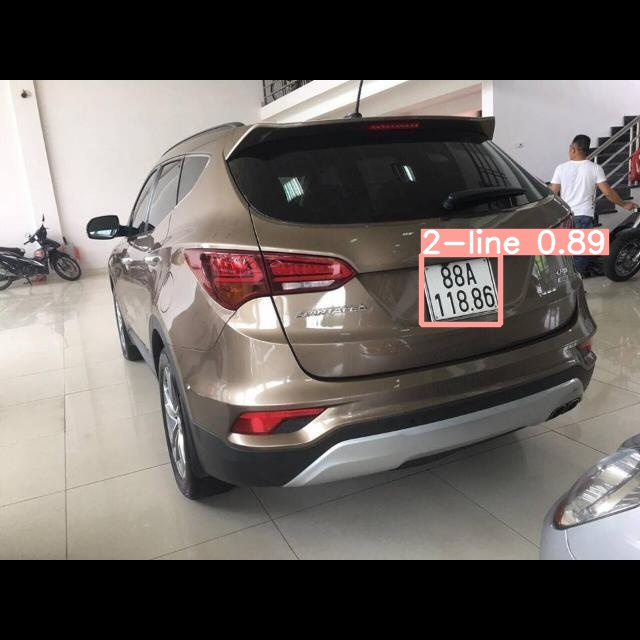

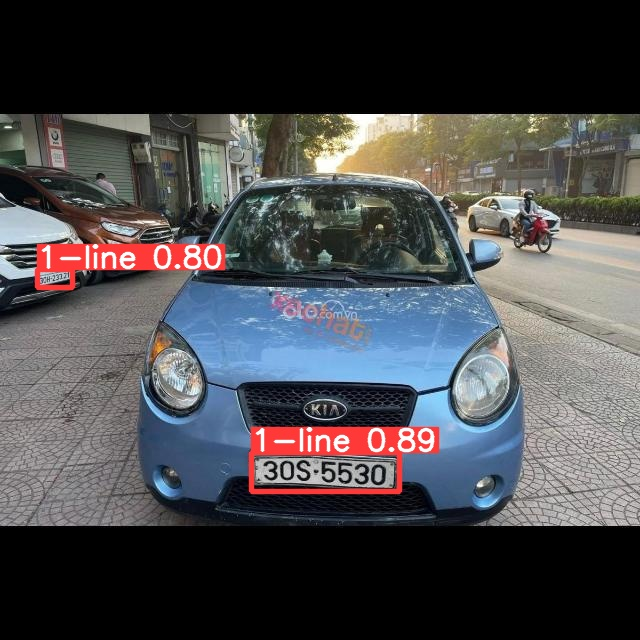

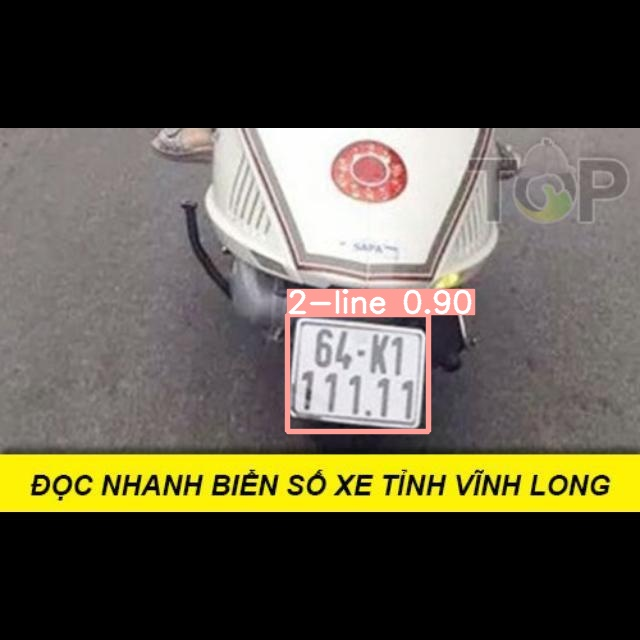

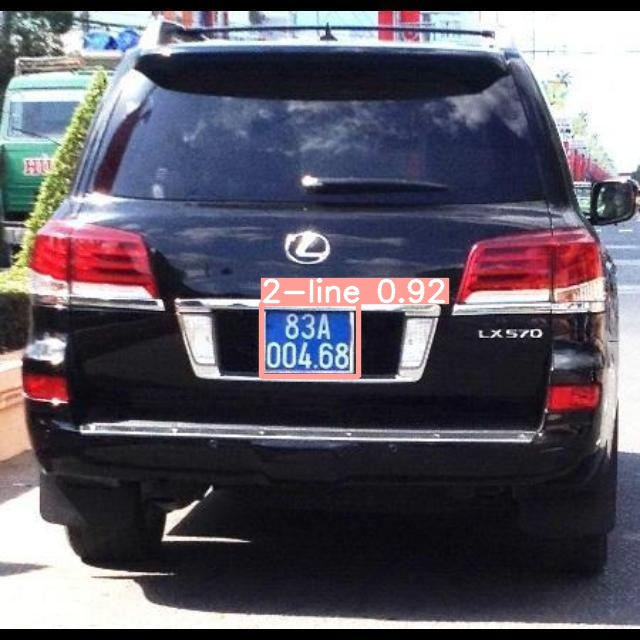

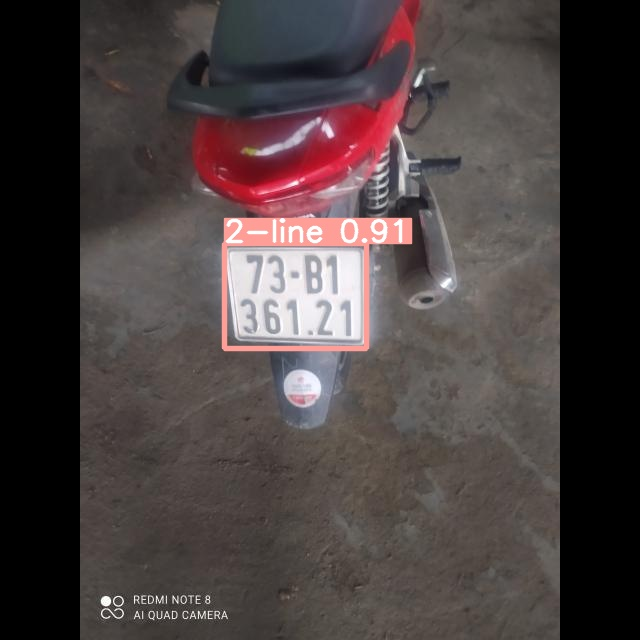

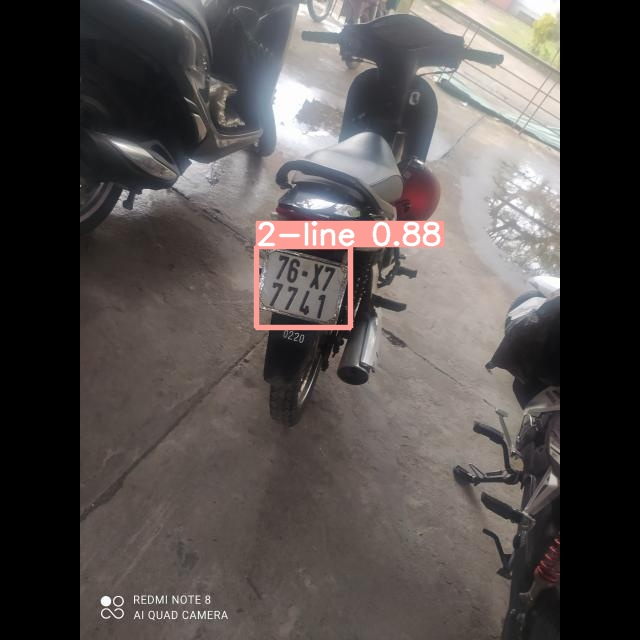

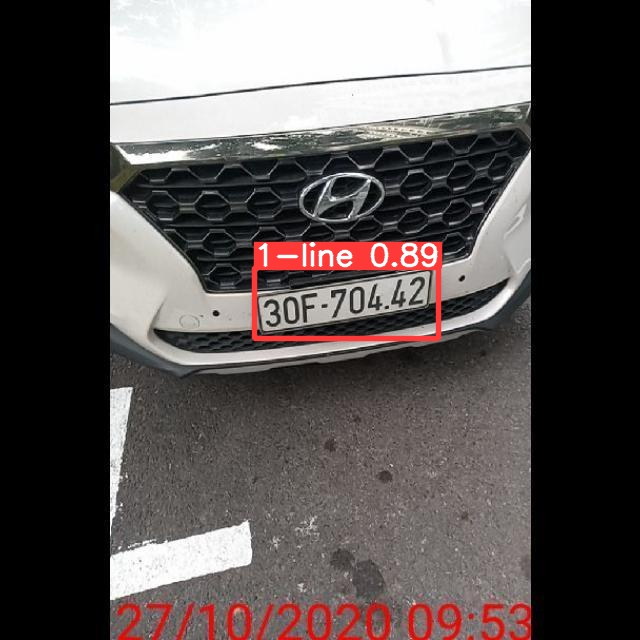

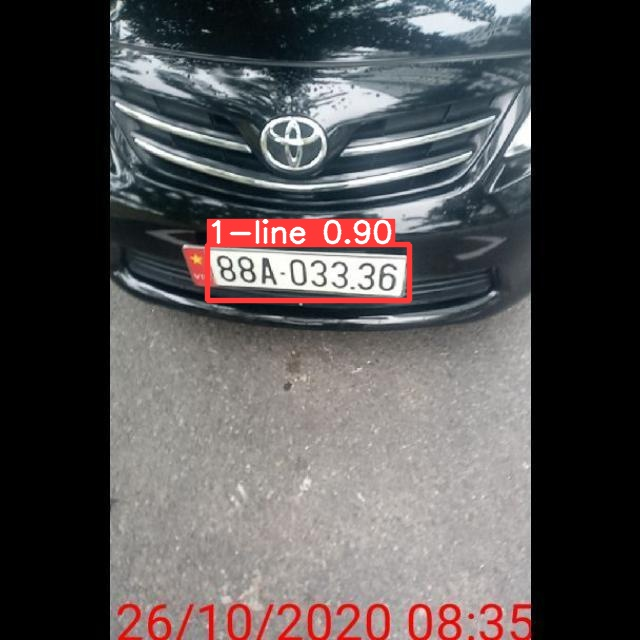

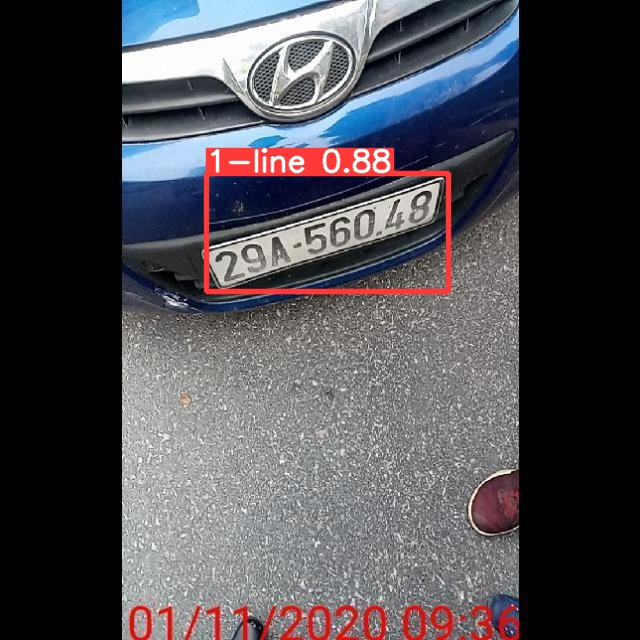

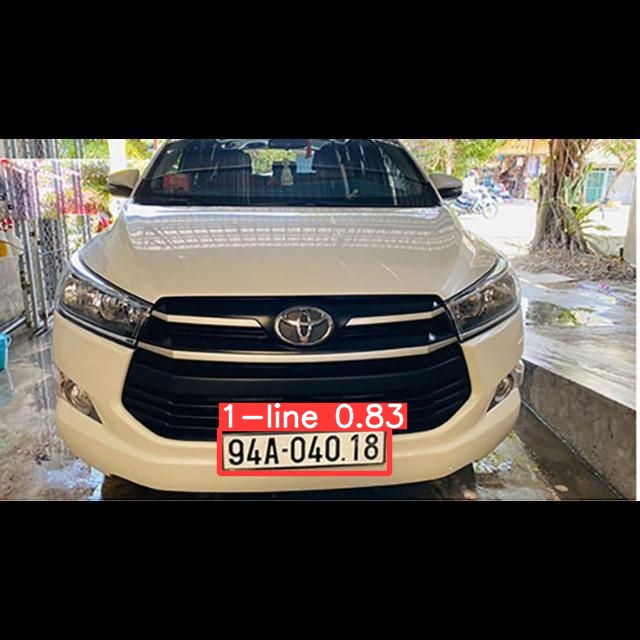

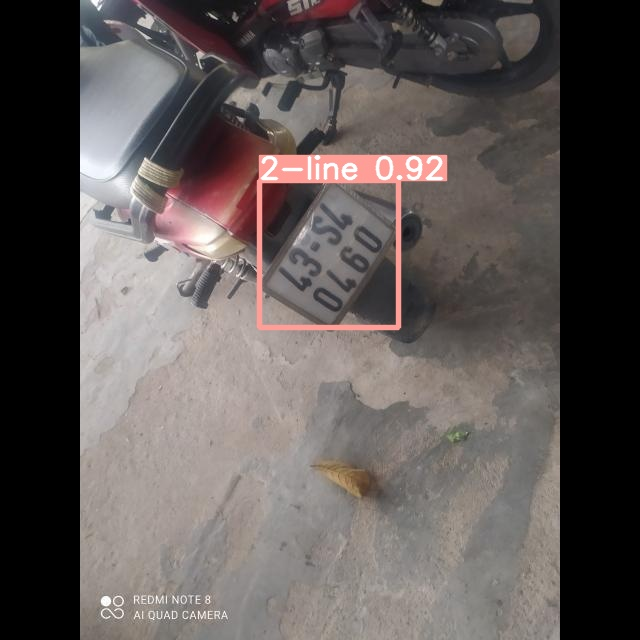

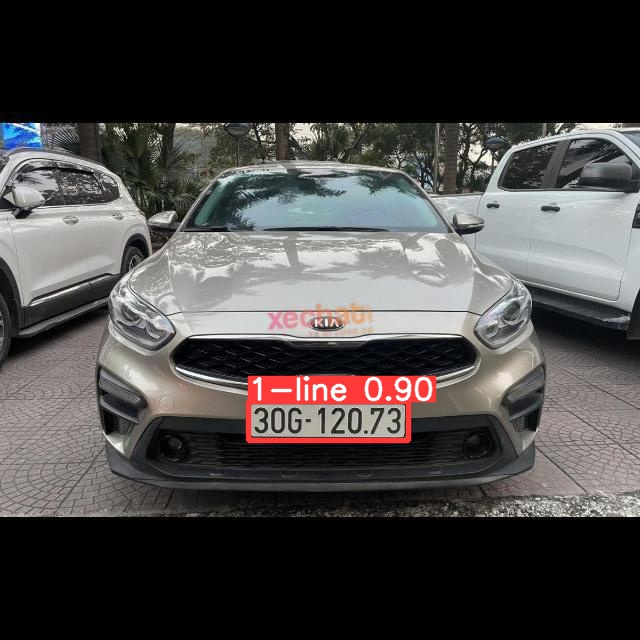

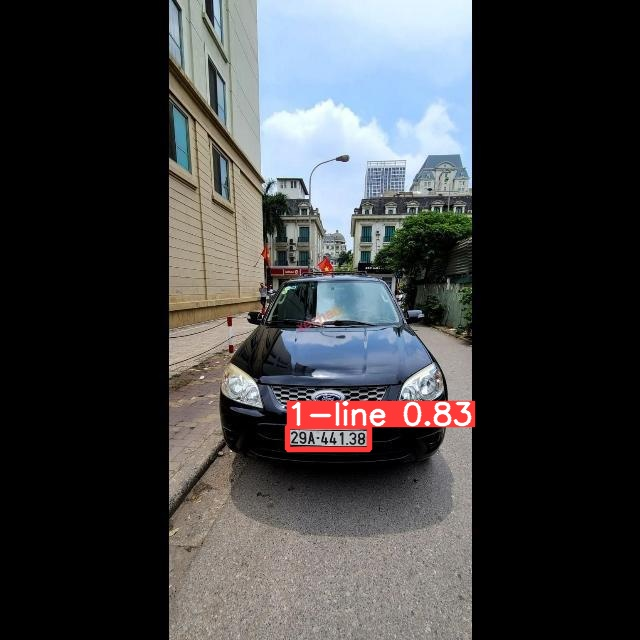

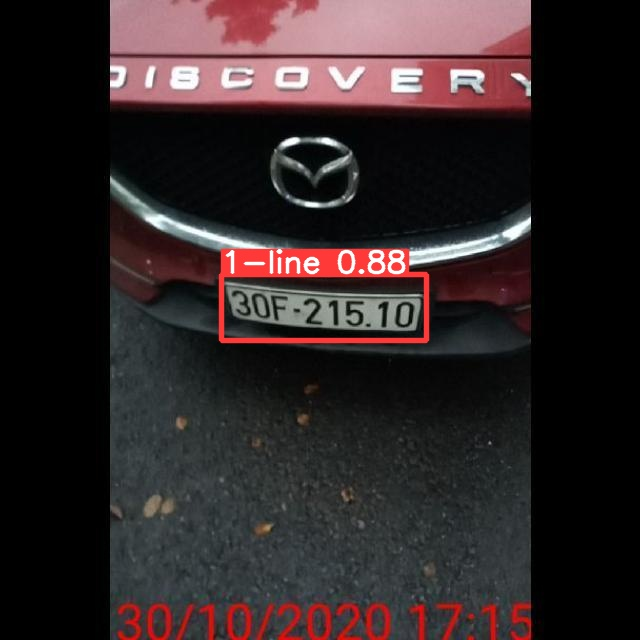

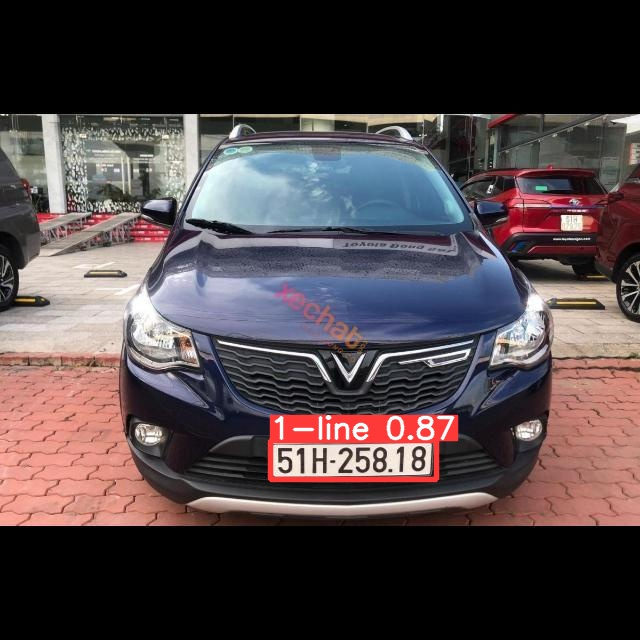

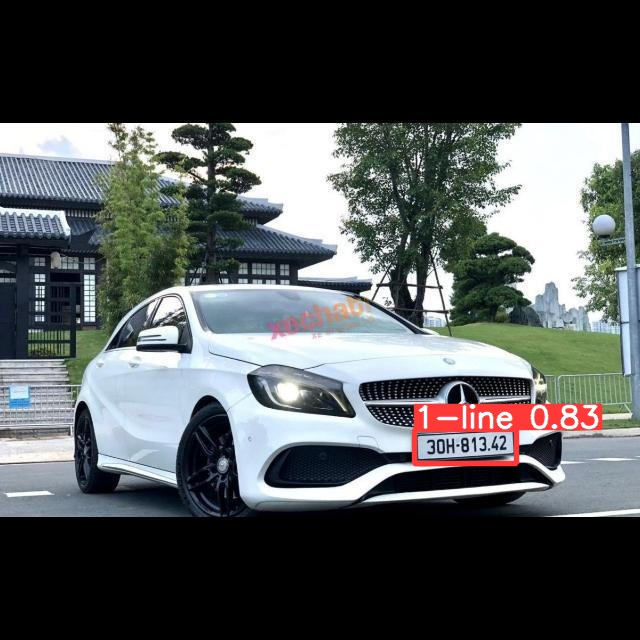

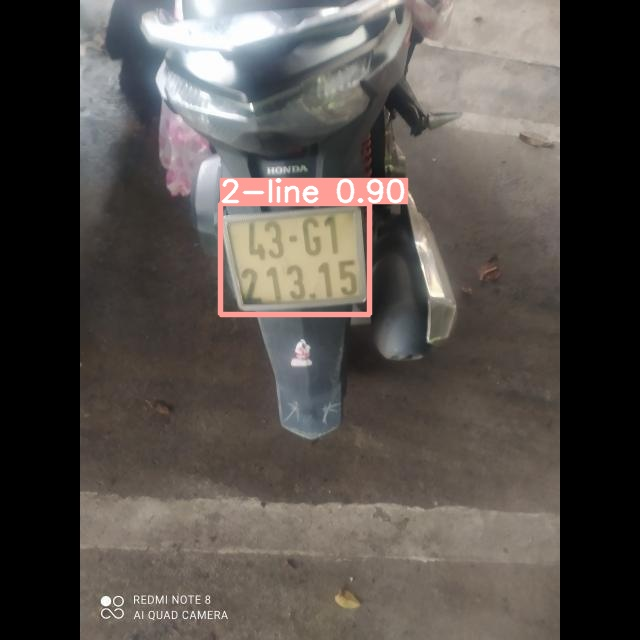

In [13]:
import glob

for imageName in glob.glob('runs/detect/exp/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

# Lưu mô hình cho những lần sử dụng sau
Các files trên Colab sẽ bị xoá sau một khoảng thời gian nhất định, chúng ta nên lưu lại files mô hình để sử dụng về sau. Các files có thể được tải trực tiếp về máy hoặc lưu lại trên Google Drive.
```
from google.colab import drive
drive.mount('/content/gdrive')
```

```
%cp /content/yolov5/runs/train/custom_model/weights/best.pt /content/gdrive/Your_Drive
```

